In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Q1 ##
# Following is the income tax department data for the number of tax payers along with the range of
# income tax they paid for a particular year. Find Mean, Median, Mode, Quartile, Quartile Deviations,
# Standard Deviation
data = pd.DataFrame({'Tax_paid_in_Rs_Thousand':['20-24','25-29','30-34','35-39','40-44','45-49'], 'No of taxpayer':[45,200,130,65,45,15]})
data

,Tax_paid_in_Rs_Thousand,No of taxpayer
0,20-24,45
1,25-29,200
2,30-34,130
3,35-39,65
4,40-44,45
5,45-49,15


In [6]:
data.describe()

,No of taxpayer
count,6.000000
mean,83.333333
std,68.896057
min,15.000000
25%,45.000000
50%,55.000000
75%,113.750000
max,200.000000


In [3]:
## Q2 ##
# df = pd.read_excel('Regression.xlsx')
df = pd.read_excel('Regression.xlsx',skiprows=6,header=None)
df

,0,1
0,Marks in Economics,Marks in Statistics
1,25,43
2,28,46
3,35,49
4,32,41
5,31,36
6,36,32
7,29,31
8,38,30
9,34,33


In [39]:
# df.columns = df.iloc[:1,:].values[0], df.iloc[:1,:].values[0][1]
df.columns = ['Marks in Economics', 'Marks in Statistics']
df_new = df.iloc[1:,:]
df_new

,Marks in Economics,Marks in Statistics
1,25,43
2,28,46
3,35,49
4,32,41
5,31,36
6,36,32
7,29,31
8,38,30
9,34,33
10,32,39


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Marks in Economics   10 non-null     object
 1   Marks in Statistics  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [41]:
df_new.describe()

,Marks in Economics,Marks in Statistics
count,10,10
unique,9,10
top,32,43
freq,2,1


In [44]:
df_new.corr()

,Marks in Economics,Marks in Statistics
Marks in Economics,1.000000,-0.393983
Marks in Statistics,-0.393983,1.000000


In [45]:
# For X (independent variable), take all the columns from the file, except salary
X = df_new.iloc[:, :-1].values

# For Y (dependent variable), take the second column, which is salary
y = df_new.iloc[:,1].values

In [46]:
# Step 2: Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make Prediction
y_pred = regressor.predict(X_test)
print(y_pred)

[33.55945946 34.54324324 37.49459459 36.51081081]


In [47]:
print(X_train)
type(X_train)
print(regressor.predict(X_train))
print(X_train)

[[28]
 [29]
 [38]
 [32]
 [25]
 [36]]
[40.44594595 39.46216216 30.60810811 36.51081081 43.3972973  32.57567568]
[[28]
 [29]
 [38]
 [32]
 [25]
 [36]]


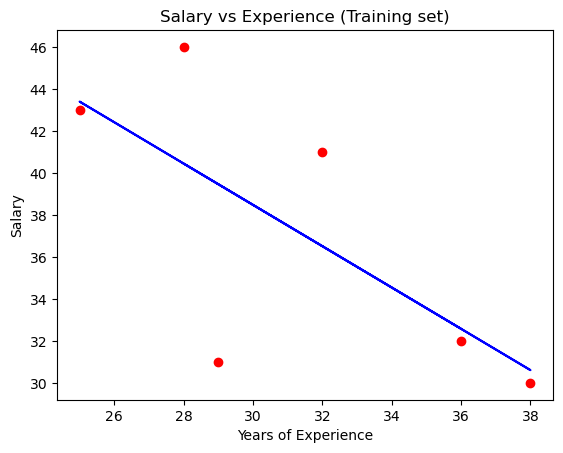

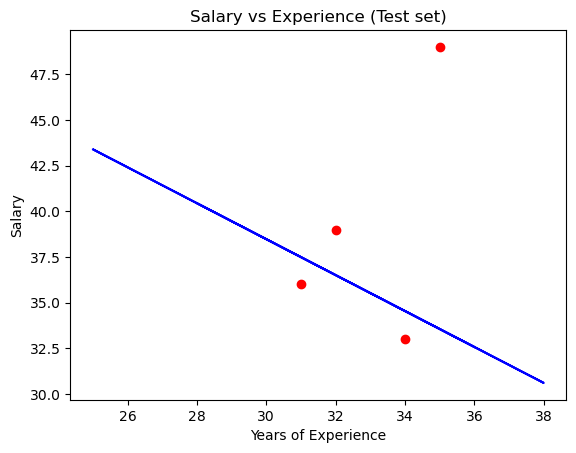

In [48]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [50]:
# Step 7 - Make new prediction
new_marks_pred = regressor.predict([[45]])
print('The predicted marks of a person in stats when the person has got 45 marks in exonomics is ',new_marks_pred)

# Step 8 - Intercept and Coefficient
# Intercept: Salary for "0" years of experience (What will be y-axis value if x-axis value is 0?) 
print("Intercept ... marks in stats: ", regressor.intercept_)
# coefficient: For each additional year, how much additional salary will we offer?
print("Coefficient ... Marks in stats for each mark scored in math: ", regressor.coef_)

# Evaluate results
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

# on average, the predictions were off by around 3426.43 units from the actual values
print(f"MAE = {MAE}") 

# Squares the absolute differences between the predicted values and the actual values, 
# and then averages them - Squaring the errors gives more weight to larger errors
# An MSE of 21026037.33 suggests that there might be some outliers or 
# significant errors in our predictions, as squaring amplifies their 
# contribution to the MSE value
print(f"MSE = {MSE}")

# Now take the square root of the MSE - It has the same units as the original data, 
# making it easier to interpret in the context of our specific problem
# An RMSE of 4585.42 implies that the average prediction error was around 4585.42 units
print(f"RMSE = {RMSE}")

'''
A lower MAE, MSE, and RMSE generally indicate better model performance, meaning the 
predictions are closer to the actual values
The high MSE value compared to MAE suggests that there might be a few instances 
where the model's predictions were significantly far off from the actual values
'''

The predicted marks of a person in stats when the person has got 45 marks in exonomics is  [23.72162162]
Intercept ... Fresher Salary:  67.9918918918919
Coefficient ... Additional Salary for Each Additional Year's Experience:  [-0.98378378]
MAE = 5.241891891891894
MSE = 62.30544192841489
RMSE = 7.893379626523413


"\nA lower MAE, MSE, and RMSE generally indicate better model performance, meaning the \npredictions are closer to the actual values\nThe high MSE value compared to MAE suggests that there might be a few instances \nwhere the model's predictions were significantly far off from the actual values\n"